In [167]:
# project work flow
# 1. choose a data set (i choose kidney prediction classification data)
# 2. import all the  necessary libraries
# 3. load the data set using pandas module
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
# 5. model creation by invoking algorithm
# 6. model training by fitting (x train & y train) data
# 7. model prediction (ypre)- 'using xtest'
# 8. calculate perfomace accuracy using output metrics

In [168]:
# 2. import all the  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [169]:
# 3. load the data set using pandas module
dataset =pd.read_csv("weather_classification_data.csv")

In [170]:
dataset.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [171]:
dataset.shape

(13200, 11)

In [172]:
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [173]:
dataset.isnull()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13195,False,False,False,False,False,False,False,False,False,False,False
13196,False,False,False,False,False,False,False,False,False,False,False
13197,False,False,False,False,False,False,False,False,False,False,False
13198,False,False,False,False,False,False,False,False,False,False,False


In [174]:
dataset.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [175]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13195    False
13196    False
13197    False
13198    False
13199    False
Length: 13200, dtype: bool

In [176]:
dataset.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [177]:
dataset.median

<bound method DataFrame.median of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  

In [178]:
dataset.mode

<bound method DataFrame.mode of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV

In [179]:
dataset.keys()

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [180]:
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,10].values

In [181]:
print(x.shape)
print(y.shape)

(13200, 4)
(13200,)


In [182]:
x[:5]

array([[14. , 73. ,  9.5, 82. ],
       [39. , 96. ,  8.5, 71. ],
       [30. , 64. ,  7. , 16. ],
       [38. , 83. ,  1.5, 82. ],
       [27. , 74. , 17. , 66. ]])

In [183]:
y[:5]

array(['Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy'], dtype=object)

In [184]:
# data spliting
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [185]:
print('training input samples count',xtrain.shape)
print('training output samples count',ytrain.shape)
print('testing input samples count',xtest.shape)
print('testing output samples count',ytest.shape)

training input samples count (10560, 4)
training output samples count (10560,)
testing input samples count (2640, 4)
testing output samples count (2640,)


LOGISTICREGRESSION

In [186]:
#5.model creation by invoking algorithm
logreg = LogisticRegression()

In [187]:
#6.model training by fitting (X train & y train) data
logreg.fit(xtrain,ytrain)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
#7. model prediction (ypre)- 'using xtest '
ypre_l= logreg.predict(xtest)

In [189]:
#8. calculate perfomace accuracy using output metrics
LG=accuracy_score(ytest,ypre_l)
LG

0.7856060606060606

In [190]:
compare = pd.DataFrame({'actual output':ytest, 'predicted output':ypre_l})
compare

,actual output,predicted output
0,Rainy,Rainy
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Cloudy,Cloudy
4,Snowy,Snowy
...,...,...
2635,Snowy,Snowy
2636,Sunny,Sunny
2637,Cloudy,Sunny
2638,Cloudy,Cloudy


DECISION TREE

GINI AND ENTROPY

In [191]:
#5.model creation by invoking algorithm
dtree = DecisionTreeClassifier()

In [192]:
# 5. model creation by invoking algorithm
dtree = DecisionTreeClassifier(max_depth = 6,criterion = 'gini')# (max_depth = 6,criterion = 'entropy') (n_estimators=10,criterion = 'gini')

In [193]:
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)

In [194]:
#6.model training by fitting (X train & y train) data
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6)

In [195]:
#7. model prediction (ypre)- 'using xtest '
ypre_DTG=dtree.predict(xtest)

In [196]:
# 8. calculate perfomace accuracy using output metricsds
DTG=accuracy_score(ytest,ypre_DTG)
DTG

0.8693181818181818

In [197]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_DTG})
compare

,actual output,predicted output
0,Rainy,Rainy
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Cloudy,Cloudy
4,Snowy,Snowy
...,...,...
2635,Snowy,Snowy
2636,Sunny,Sunny
2637,Cloudy,Sunny
2638,Cloudy,Cloudy


DT(ENTROPY) METHOIDS

In [198]:
dtree = DecisionTreeClassifier(max_depth = 6,criterion = 'entropy')

In [199]:
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)

In [200]:
#6.model training by fitting (X train & y train) data
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [201]:
#7. model prediction (ypre)- 'using xtest '
ypre_DTE = dtree.predict(xtest)

In [202]:
# 8. calculate perfomace accuracy using output metricsds
DTE=accuracy_score(ytest,ypre_DTE)
DTE

0.8640151515151515

In [203]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_DTE})
compare

,actual output,predicted output
0,Rainy,Rainy
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Cloudy,Cloudy
4,Snowy,Snowy
...,...,...
2635,Snowy,Snowy
2636,Sunny,Sunny
2637,Cloudy,Cloudy
2638,Cloudy,Cloudy


RANDOM FOREST

GINI AND ENTROPY

In [204]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier()

In [205]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier(max_depth = 6,criterion = 'gini')# (n_estimators=10,criterion = 'gini')

In [206]:
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)

In [207]:
# 6. model training by fitting (x train & y train) data
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=6)

In [208]:
# 7. model prediction (ypre)- 'using xtest'
ypre_RFG=rf.predict(xtest)

In [209]:
# 8. calculate perfomace accuracy using output metricsds
RFG=accuracy_score(ytest,ypre_RFG)
RFG

0.8746212121212121

In [210]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_RFG})
compare

,actual output,predicted output
0,Rainy,Rainy
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Cloudy,Cloudy
4,Snowy,Snowy
...,...,...
2635,Snowy,Snowy
2636,Sunny,Sunny
2637,Cloudy,Sunny
2638,Cloudy,Cloudy


RF(ENTROPY) METHODS

In [211]:
# 5. model creation by invoking algorithm
rf = RandomForestClassifier (max_depth = 6,criterion = 'entropy')  # (max_depth = 6,criterion = 'entropy'),(n_estimators=10,criterion = 'entropy')

In [212]:
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)

In [213]:
# 6. model training by fitting (x train & y train) data
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=6)

In [214]:
# 7. model prediction (ypre)- 'using xtest'
ypre_RFE=rf.predict(xtest)

In [215]:
# 8. calculate perfomace accuracy using output metricsds
RFE=accuracy_score(ytest,ypre_RFE)
RFE

0.8734848484848485

In [216]:
compare = pd.DataFrame({'actual output':ytest,'predicted output':ypre_RFE})
compare

,actual output,predicted output
0,Rainy,Rainy
1,Snowy,Snowy
2,Cloudy,Cloudy
3,Cloudy,Cloudy
4,Snowy,Snowy
...,...,...
2635,Snowy,Snowy
2636,Sunny,Sunny
2637,Cloudy,Sunny
2638,Cloudy,Cloudy


XGBOOST

In [224]:
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
x = dataset.iloc[:,0:4].values
y = dataset.iloc[:,8].values

In [225]:
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [226]:
xgbr = XGBRegressor()

In [228]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [229]:
ss = StandardScaler()
xtrain =ss.fit_transform(xtrain)
xtest =ss.fit_transform(xtest)

In [230]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print('training score is:',score)

training score is: 0.7718347236594065


In [231]:
cv_score = cross_val_score(xgbr,xtrain,ytrain,cv=10)
print('cv max score is:',cv_score.mean())

cv max score is: 0.3493212105476656


In [232]:
ypred_XG=xgbr.predict(xtest)
mse=mean_squared_error(ytest,ypred_XG)
print('MSE is:',mse)
print('rmse is:',mse*(1/2.0))

MSE is: 7.515779675631333
rmse is: 3.7578898378156667


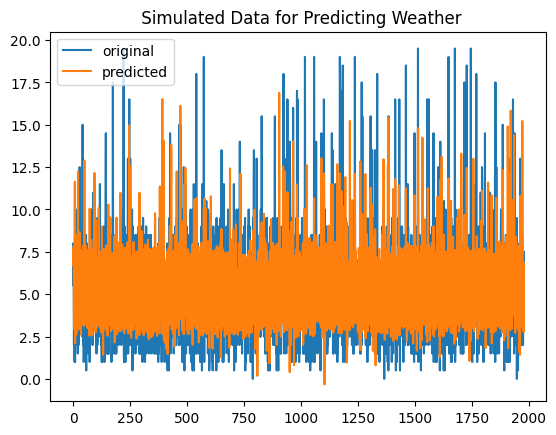

In [233]:
x_ax=range(len(ytest))
plt.plot(x_ax,ytest,label='original')
plt.plot(x_ax,ypred_XG,label='predicted')
plt.title(' Simulated Data for Predicting Weather')
plt.legend()
plt.show()

In [240]:
report = pd.DataFrame({'model':['LogisticRegression','Decisiontree_Gini','Decisiontree_Entropy','RandomForest_Gini','RandomForest_Entropy'],
                       'accuracy%':[LG*100,DTG*100,DTE*100,
                                    RFG*100,RFE*100]})

report

,model,accuracy%
0,LogisticRegression,78.560606
1,Decisiontree_Gini,86.931818
2,Decisiontree_Entropy,86.401515
3,RandomForest_Gini,87.462121
4,RandomForest_Entropy,87.348485


<Axes: ylabel='accuracy%'>

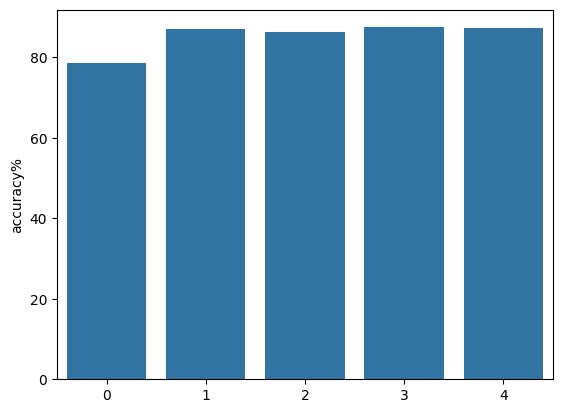

In [242]:
# visualizing the report of all three algorithm
sns.barplot(report['accuracy%'])       

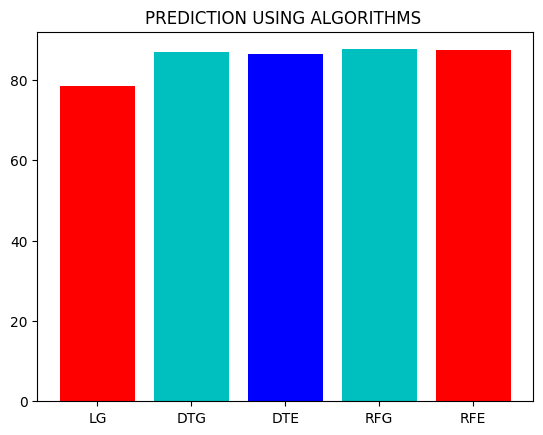

In [244]:
count = [78.56,86.93,86.36,87.61,87.46]
color_code = ['r','c','b','c','r','b']
plt.bar(['LG','DTG','DTE','RFG','RFE'],count,color 
=color_code)
plt.title('PREDICTION USING ALGORITHMS ')
plt.show()